# Fashion MNIST classification

## 1. Load and preprocess the data

Import the needed packages

In [32]:
#from tensorflow import keras
import keras
from keras.layers import Conv2D, BatchNormalization,Activation, MaxPooling2D,Flatten,Dense,Dropout

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pd

In [65]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

In [66]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [67]:
type(x_train)

numpy.ndarray

In [68]:
x_train.dtype, y_train.dtype,x_test.dtype,y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [69]:
# Scale the images, and ensure correct dimensions for Keras convolutions
x_train=x_train.astype("float32").reshape(-1,28,28,1)/255
x_test=x_test.astype("float32").reshape(-1,28,28,1)/255

In [70]:
num_classes=len(set(y_train))
num_classes

10

In [71]:
# One-hot encode the targets. 
y_train=keras.utils.to_categorical(y_train,num_classes=num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes=num_classes)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [72]:
y_test.shape

(10000, 10)

## 2. Build the model

In [33]:
# We use 3 convolution layers with batch normalisation and max pooling
# At the end there are two Dense layers 
inputs=keras.Input(shape=x_train.shape[1:4])
x=Conv2D(filters=32,kernel_size=3)(inputs)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)

x=Conv2D(filters=64,kernel_size=3)(inputs)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)

x=Conv2D(filters=128,kernel_size=3)(inputs)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=MaxPooling2D()(x)

x=Flatten()(x)
x=Dense(units=100)(x)
x=Activation('relu')(x)
x=Dense(units=num_classes)(x)
outputs=Activation('softmax')(x)

model=keras.Model(inputs=inputs,outputs=outputs)

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 128)       512       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 128)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2163300   
__________

## 3. Train the model

In [47]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
r=model.fit(x_train,y_train,batch_size=128,epochs=4,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/4
54000/54000 [==============================] - 2703s 50ms/step - loss: 0.2408 - acc: 0.9136 - val_loss: 0.3296 - val_acc: 0.8783
Epoch 2/4
54000/54000 [==============================] - 2715s 50ms/step - loss: 0.2188 - acc: 0.9203 - val_loss: 0.3340 - val_acc: 0.8753
Epoch 3/4
54000/54000 [==============================] - 2726s 50ms/step - loss: 0.1998 - acc: 0.9271 - val_loss: 0.3238 - val_acc: 0.8880
Epoch 4/4
49024/54000 [==========================>...] - ETA: 4:00 - loss: 0.1864 - acc: 0.9329

In [51]:
model.save('fashion_mnist_model.h5')

## 4. Evaluate the model

In [73]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2888996245145798
Test accuracy: 0.9008


In [53]:
print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


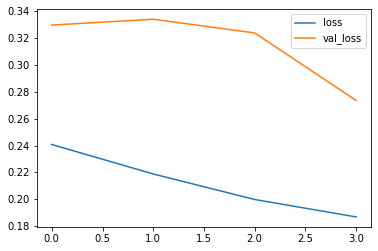

In [54]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

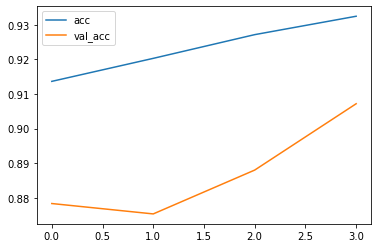

In [55]:
plt.plot(r.history['acc'],label='acc')
plt.plot(r.history['val_acc'],label='val_acc')
plt.legend()
plt.show()

In [56]:
y_pred=model.predict(x_test)
y_pred[0]

array([1.62957775e-07, 1.43407286e-08, 7.29374889e-08, 4.97188202e-09,
       1.10562425e-07, 4.23292280e-04, 1.79722139e-08, 1.78042240e-03,
       9.90656076e-07, 9.97794986e-01], dtype=float32)

In [58]:
y_pred=model.predict(x_test).argmax(axis=1)
y_pred[0]

9

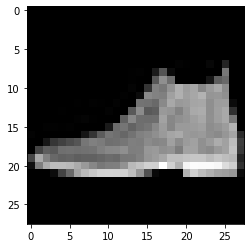

In [59]:
plt.imshow(x_test[0].reshape(28,28),cmap='gray')

In [60]:
labels=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
labels[y_pred[0]] 

'Ankle boot'

In [62]:
from sklearn.metrics import confusion_matrix

In [75]:
y_test.shape,y_pred.shape

((10000, 10), (10000,))

In [77]:
confusion_matrix(np.argmax(y_test,axis=-1),y_pred)

array([[815,   2,   9,  43,   8,   3, 111,   0,   9,   0],
       [  0, 985,   1,  10,   2,   0,   1,   0,   1,   0],
       [ 12,   3, 801,   8,  85,   1,  89,   0,   1,   0],
       [ 10,  15,   5, 924,  17,   0,  27,   0,   2,   0],
       [  0,   1,  41,  35, 866,   1,  56,   0,   0,   0],
       [  0,   0,   0,   1,   0, 980,   0,  14,   1,   4],
       [ 95,   5,  38,  36,  63,   1, 750,   0,  12,   0],
       [  0,   0,   0,   0,   0,  16,   0, 970,   2,  12],
       [  1,   3,   1,   6,   0,   5,   8,   2, 974,   0],
       [  0,   0,   0,   0,   0,   9,   1,  47,   0, 943]])

In [81]:
y_test_num=np.argmax(y_test,axis=-1)
y_test_num.shape

(10000,)

Text(0.5, 1.0, 'True label: T-shirt, Predicted: Bag')

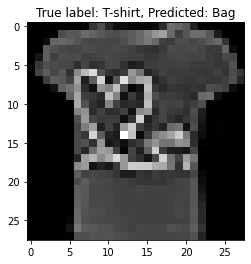

In [85]:
# Look at misclassified examples
misclassified_idx=np.where(y_pred!=y_test_num)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title(f"True label: {labels[y_test_num[i]]}, Predicted: {labels[y_pred[i]]}")